In [ ]:
!pip install real-simple-stats

In [ ]:


from real_simple_stats import mean, z_score, lookup

print(mean([1, 2, 3]))
print(z_score(85, 80, 5))
print(lookup("μ"))  # Population mean


2.0
1.0
Population mean — average of a population.


In [ ]:

import pandas as pd



# Load the dataset
df = pd.read_csv("CalaverasData.csv")
df = df[df["jump #"].isin([1, 2])]
df = df[["jump distance", "jump #", "rent/ind/pro"]].dropna()
df.columns = ["jump_distance", "jump_number", "group"]

# Extract jump1 values
jump1_values = df[df["jump_number"] == 1]["jump_distance"].tolist()

# Display values to validate before updating tutorial code
jump1_values[:5], df.head()

([165.95, 27.158, 40.914, 35.853, 43.911],
    jump_distance  jump_number  group
 0        165.950          1.0    3.0
 1        177.480          2.0    3.0
 3         27.158          1.0    3.0
 4          0.000          2.0    3.0
 6         40.914          1.0    3.0)

➡️ Mean: 122.1121735632183
➡️ Median: 132.72
➡️ Sample Standard Deviation: 49.31985417888475
➡️ Sample Variance: 2432.448016226456
➡️ Coefficient of Variation (%): 40.38897412087381
➡️ Interquartile Range: 81.485
➡️ Five Number Summary: {'min': 10.229, 'Q1': 81.985, 'median': 132.72, 'Q3': 163.47, 'max': 216.24}
➡️ Is Discrete? False
➡️ Is Continuous? True
➡️ Frequency Table (Group): {'3.0': 683, '1.0': 142, '-1.0': 23, '2.0': 22}
➡️ Cumulative Frequency Table (Jump1 rounded): {10: 1, 14: 2, 15: 3, 16: 4, 18: 5, 20: 7, 21: 8, 22: 11, 23: 12, 25: 15, 26: 16, 27: 19, 28: 20, 29: 21, 30: 23, 31: 26, 32: 29, 33: 32, 34: 34, 35: 38, 36: 41, 37: 46, 38: 51, 39: 56, 40: 61, 41: 68, 42: 73, 43: 81, 44: 86, 45: 90, 46: 98, 47: 101, 48: 103, 49: 105, 50: 107, 51: 110, 52: 116, 53: 118, 54: 123, 55: 127, 56: 128, 57: 133, 58: 141, 59: 143, 60: 146, 61: 150, 62: 152, 63: 154, 64: 157, 65: 158, 66: 162, 67: 164, 68: 168, 69: 171, 71: 176, 72: 178, 73: 183, 74: 190, 75: 193, 76: 196, 77: 197, 78: 20

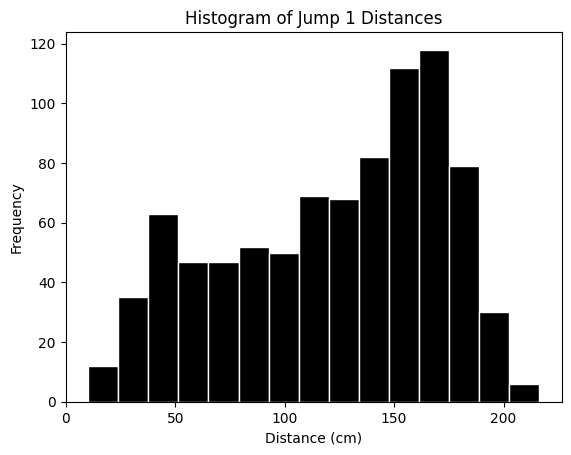

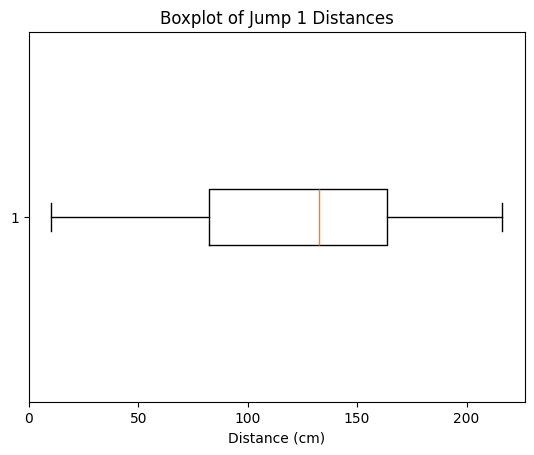

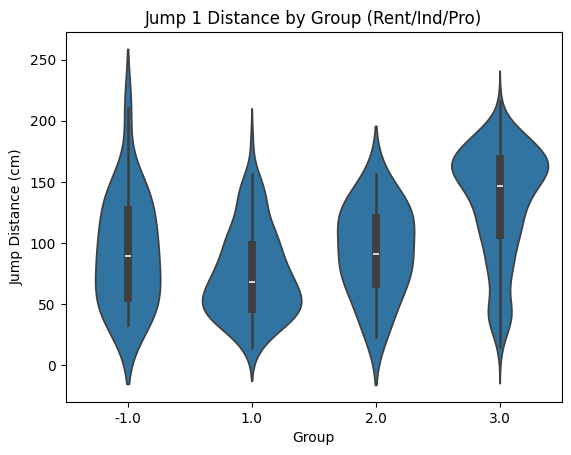

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from real_simple_stats.descriptive_statistics import (
    mean, median, sample_variance, sample_std_dev,
    coefficient_of_variation, interquartile_range, five_number_summary,
    is_discrete, is_continuous, draw_frequency_table, draw_cumulative_frequency_table
)

# Load and clean the dataset
df = pd.read_csv("CalaverasData.csv")
df = df[df["jump #"].isin([1, 2])]
df = df[["jump distance", "jump #", "rent/ind/pro"]].dropna()
df.columns = ["jump_distance", "jump_number", "group"]

# Filter to Jump #1
jump1 = df[df["jump_number"] == 1]["jump_distance"].tolist()

# Basic stats
print("➡️ Mean:", mean(jump1))
print("➡️ Median:", median(jump1))
print("➡️ Sample Standard Deviation:", sample_std_dev(jump1))
print("➡️ Sample Variance:", sample_variance(jump1))
print("➡️ Coefficient of Variation (%):", coefficient_of_variation(jump1))
print("➡️ Interquartile Range:", interquartile_range(jump1))
print("➡️ Five Number Summary:", five_number_summary(jump1))

# Variable type
print("➡️ Is Discrete?", is_discrete(jump1))
print("➡️ Is Continuous?", is_continuous(jump1))

# Group Frequency Table
group_labels = df[df["jump_number"] == 1]["group"].astype(str).tolist()
freq_table = draw_frequency_table(group_labels)
print("➡️ Frequency Table (Group):", freq_table)

# Cumulative Frequency Table (rounded distances for grouping)
jump1_rounded = [round(x) for x in jump1 if x > 0]
cum_freq_table = draw_cumulative_frequency_table(jump1_rounded)
print("➡️ Cumulative Frequency Table (Jump1 rounded):", cum_freq_table)

# --- Plots ---

# Histogram
plt.hist(jump1, bins=15, color='black', edgecolor='white')
plt.title("Histogram of Jump 1 Distances")
plt.xlabel("Distance (cm)")
plt.ylabel("Frequency")
plt.savefig("jump1_hist.png")
plt.show()

# Boxplot
plt.boxplot(jump1, vert=False)
plt.title("Boxplot of Jump 1 Distances")
plt.xlabel("Distance (cm)")
plt.savefig("jump1_box.png")
plt.show()

# Violin plot by group
jump1_df = df[df["jump_number"] == 1]
sns.violinplot(data=jump1_df, x="group", y="jump_distance")
plt.title("Jump 1 Distance by Group (Rent/Ind/Pro)")
plt.xlabel("Group")
plt.ylabel("Jump Distance (cm)")
plt.savefig("jump1_violin.png")
plt.show()


In [ ]:
from real_simple_stats.normal_distributions import normal_pdf, normal_cdf
from real_simple_stats.descriptive_statistics import mean, sample_std_dev

mu = mean(jump1)
sigma = sample_std_dev(jump1)

xs = [x for x in range(100, 200)]
ys_pdf = [normal_pdf(x, mu, sigma) for x in xs]
ys_cdf = [normal_cdf(x, mu, sigma) for x in xs]

# Plot PDF
plt.plot(xs, ys_pdf, color="black")
plt.title("Normal PDF of Jump 1 Distances")
plt.xlabel("Jump Distance (cm)")
plt.ylabel("Density")
plt.savefig("jump1_normal_pdf.png")
plt.show()

# Plot CDF
plt.plot(xs, ys_cdf, color="black")
plt.title("Normal CDF of Jump 1 Distances")
plt.xlabel("Jump Distance (cm)")
plt.ylabel("Cumulative Probability")
plt.savefig("jump1_normal_cdf.png")
plt.show()


ImportError: cannot import name 'normal_pdf' from 'real_simple_stats.normal_distributions' (/usr/local/lib/python3.11/dist-packages/real_simple_stats/normal_distributions.py)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def set_minimalist_style():
    """Apply a Tufte-inspired minimalist style to Matplotlib."""
    plt.rcParams.update({
        "font.family": "serif",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.edgecolor": "black",
        "axes.linewidth": 0.8,
        "xtick.direction": "out",
        "ytick.direction": "out",
        "xtick.major.size": 4,
        "ytick.major.size": 4,
        "axes.labelsize": 12,
        "axes.titlesize": 13,
        "legend.frameon": False,
        "axes.grid": False,
        "grid.color": "white"
    })


def plot_norm_hist(data, mean, std, bins=30, show_pdf=True, show_lines=True, title=True):
    """Plot a histogram of data with optional normal curve and markers."""
    set_minimalist_style()

    _, bins_edges, _ = plt.hist(data, bins=bins, density=True, alpha=0.5, edgecolor='black')

    if show_pdf:
        x = np.linspace(min(bins_edges), max(bins_edges), 300)
        y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        plt.plot(x, y, color='black', linewidth=1.5)

    if show_lines:
        plt.axvline(mean -  2*std, color='black', linestyle='--', linewidth=1)
        plt.axvline(mean +  2*std, color='black', linestyle='--', linewidth=1)

    if title:
        plt.title(f"Normal Distribution (μ = {mean:.2f}, σ = {std:.2f})")

    plt.savefig("norm_hist.png", bbox_inches="tight", dpi=300)
    plt.show()

def plot_box(data, showfliers=False):
    """Plot a horizontal boxplot without outliers."""
    set_minimalist_style()

    fig, ax = plt.subplots()
    ax.boxplot(data, vert=False, showfliers=showfliers, patch_artist=True,
               boxprops=dict(facecolor='white', edgecolor='black'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               medianprops=dict(color='black'))

    ax.set_title("Boxplot")

    plt.savefig("boxplot.png", bbox_inches="tight", dpi=300)
    plt.show()


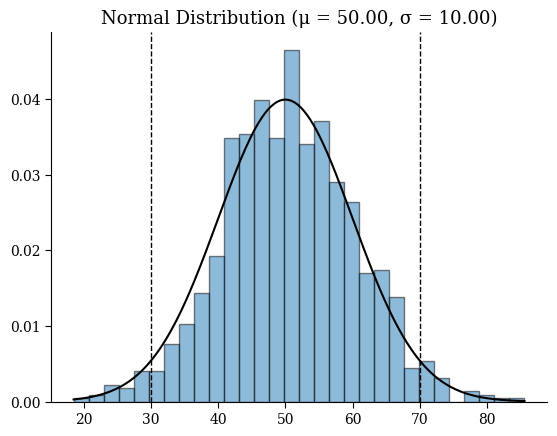

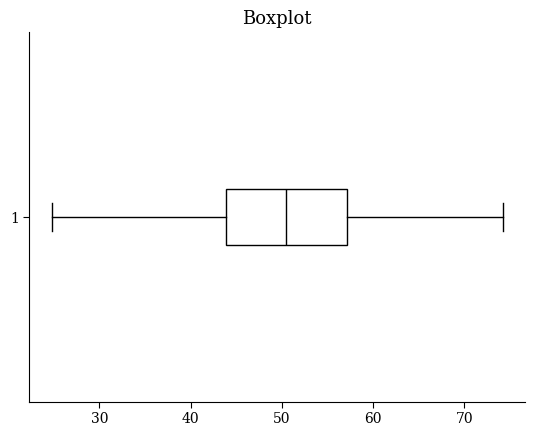

In [ ]:
import numpy as np

mu, sigma = 50, 10
data = np.random.normal(mu, sigma, 1000)

plot_norm_hist(data, mu, sigma)
plot_box(data)


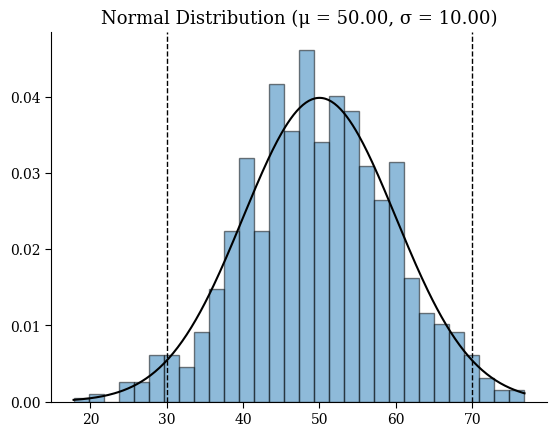

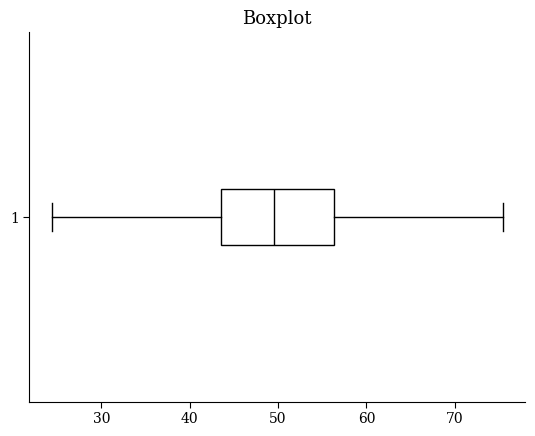

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def set_minimalist_style():
    """Apply a Tufte-inspired minimalist style to Matplotlib."""
    plt.rcParams.update({
        "font.family": "serif",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.edgecolor": "black",
        "axes.linewidth": 0.8,
        "xtick.direction": "out",
        "ytick.direction": "out",
        "xtick.major.size": 4,
        "ytick.major.size": 4,
        "axes.labelsize": 12,
        "axes.titlesize": 13,
        "legend.frameon": False,
        "axes.grid": False,
        "grid.color": "white"
    })

def plot_norm_hist(data, mean, std, bins=30, show_pdf=True, show_lines=True, title=True):
    """Plot a histogram of data with optional normal curve and markers."""
    set_minimalist_style()

    _, bins_edges, _ = plt.hist(data, bins=bins, density=True, alpha=0.5, edgecolor='black')

    if show_pdf:
        x = np.linspace(min(bins_edges), max(bins_edges), 300)
        y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        plt.plot(x, y, color='black', linewidth=1.5)

    if show_lines:
        plt.axvline(mean - 2*std, color='black', linestyle='--', linewidth=1)
        plt.axvline(mean + 2*std, color='black', linestyle='--', linewidth=1)

    if title:
        plt.title(f"Normal Distribution (μ = {mean:.2f}, σ = {std:.2f})")

    plt.savefig("norm_hist.png", bbox_inches="tight", dpi=300)
    plt.show()

def plot_box(data, showfliers=False):
    """Plot a horizontal boxplot without outliers."""
    set_minimalist_style()

    fig, ax = plt.subplots()
    ax.boxplot(data, vert=False, showfliers=showfliers, patch_artist=True,
               boxprops=dict(facecolor='white', edgecolor='black'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               medianprops=dict(color='black'))

    ax.set_title("Boxplot")

    plt.savefig("boxplot.png", bbox_inches="tight", dpi=300)
    plt.show()

if __name__ == "__main__":
    # Example usage
    import numpy as np

    mu, sigma = 50, 10
    data = np.random.normal(mu, sigma, 1000)

    plot_norm_hist(data, mu, sigma)
    plot_box(data)
